In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Basics of `rubiks` module

In [2]:
import rubiks

In [3]:
rubiks.permutation_matrix(4, [0,1,2], [1,2,0])

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [4]:
r = rubiks.Rubiks2x2()

In [5]:
r

(4,4)
(4,4)
  |
(0,0) _ (1,1) _ (2,2) _ (3,3)
(0,0)   (1,1)   (2,2)   (3,3)
  |
(5,5)
(5,5)

In [6]:
r.transform(1)

(4,0)
(4,0)
  |
(0,5) _ (1,1) _ (4,2) _ (3,3)
(0,5)   (1,1)   (4,2)   (3,3)
  |
(5,2)
(5,2)

In [7]:
r

(4,4)
(4,4)
  |
(0,0) _ (1,1) _ (2,2) _ (3,3)
(0,0)   (1,1)   (2,2)   (3,3)
  |
(5,5)
(5,5)

In [8]:
hash(r.transform(-1))

942890

# Randomizer and solver

In [9]:
random = rubiks.randomize(r, 60)

In [10]:
random

(0,4)
(0,3)
  |
(1,5) _ (0,1) _ (2,4) _ (3,5)
(2,4)   (3,0)   (4,2)   (3,1)
  |
(5,2)
(5,1)

In [11]:
solution = rubiks.solve_2way(random)

................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
.......................................................Found it!
(4,4)
(4,4)
  |
(0,0) _ (1,1) _ (2,2) _ (3,3)
(0,0)   (1,1)   (2,2)   (3,3)
  |
(5,5)
(5,5)

Came from move: 'right inverse' on
(4,0)
(4,0)
  |
(0,5) _ (1,1) _ (4,2) _ (3,3)
(0,5)   (1,1)   (4,2)   (3,3)
  

# Distances between configurations

In [12]:
cube = rubiks.Rubiks2x2()

In [13]:
cubes = []
visited = set([])

In [14]:
cubes.append([cube])
visited.add(cube)

In [15]:
for n in range(10):
    new_cubes = []
    for c in cubes[-1]:
        for t in range(len(rubiks.transformations)):
            nc = c.transform(t)
            if nc not in visited:
                new_cubes.append(nc)
                visited.add(nc)
    cubes.append(new_cubes)

In [16]:
len(cubes)

11

In [17]:
dists = [[cube.dist(c) for c in new_cubes] for new_cubes in cubes]

In [18]:
import matplotlib.pyplot as plt

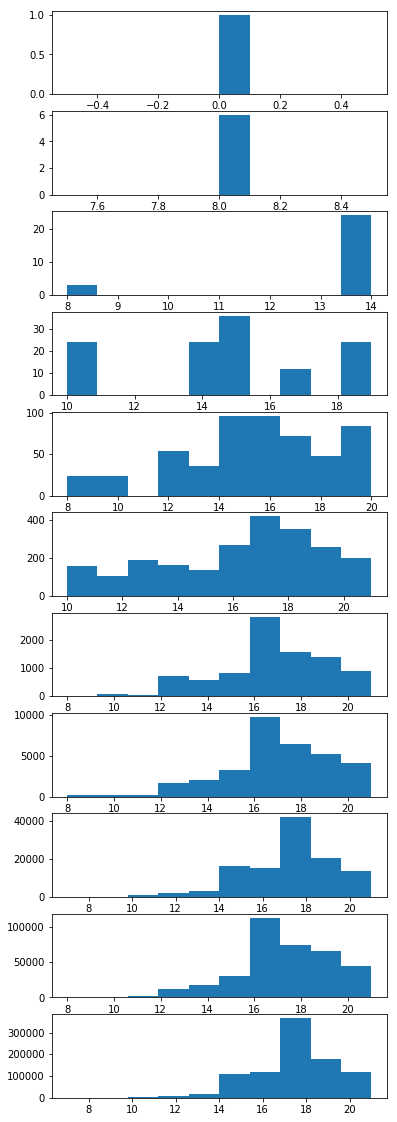

In [19]:
fig, axes = plt.subplots(nrows=len(dists), figsize=(6,20))

for n in range(len(dists)):
    axes[n].hist(dists[n])